# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# read the data
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
#to get row & coloumns from data farame we use shape function

In [8]:
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [18]:
# Use info() to print a concise summary of the DataFrame
df.dtypes

#we can use info function as well



,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [16]:
# Write your code here
#there is no missing values
missing_values = df.isnull().sum()
missing_values

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [21]:
# Write your code here
#by using min,max,mean function
minimumTime = df['food_preparation_time'].min()
AverageTime = df['food_preparation_time'].mean()
MaxTime = df['food_preparation_time'].max()

print(f"Minimum preparation time: {minimumTime} minutes")
print(f"Average preparation time: {AverageTime:.2f} minutes")
print(f"Maximum preparation time: {MaxTime} minutes")


Minimum preparation time: 20 minutes
Average preparation time: 27.37 minutes
Maximum preparation time: 35 minutes


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [22]:
# Write the code here
# sum all the order whose rating is not given using sum function

notRated = (df['rating'] == "Not given").sum()
print(f"There are {notRated} orders that are not rated.")

There are 736 orders that are not rated.


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

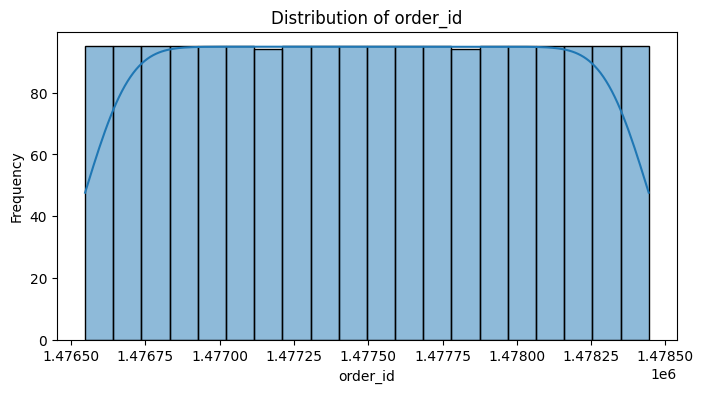

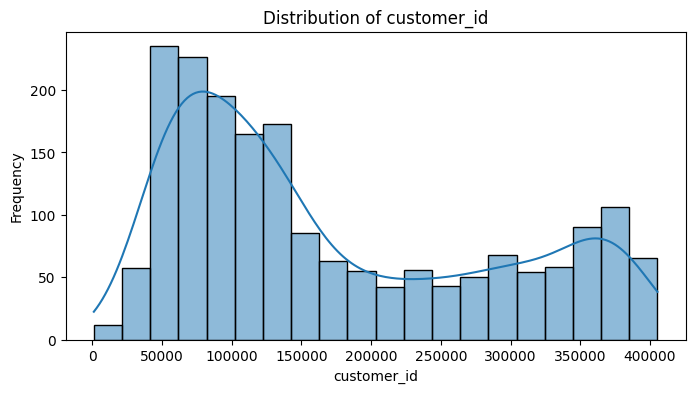

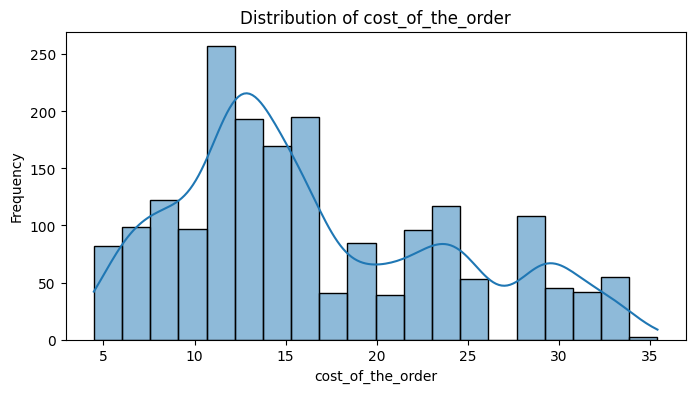

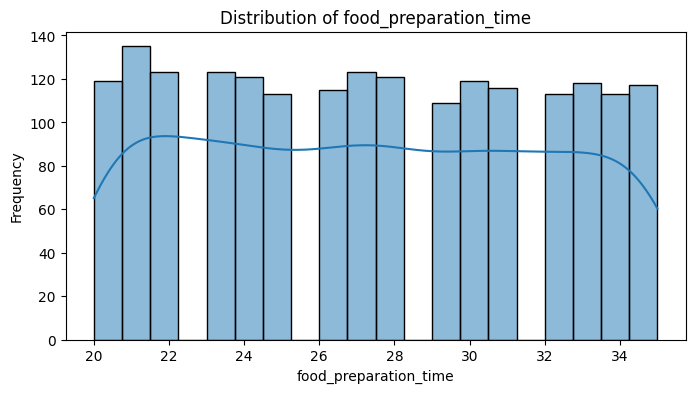

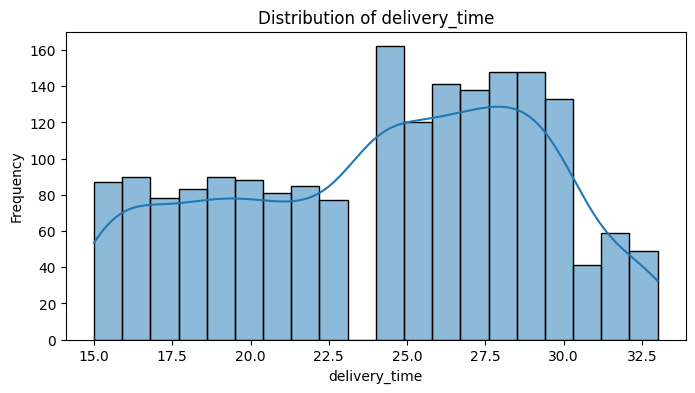

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


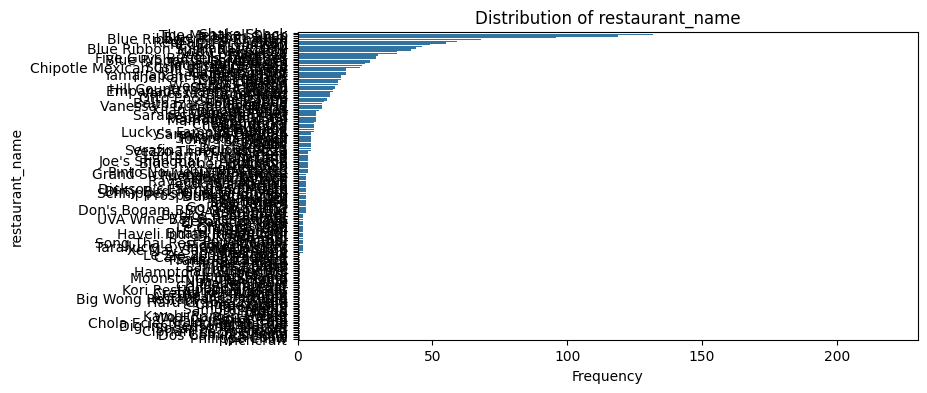

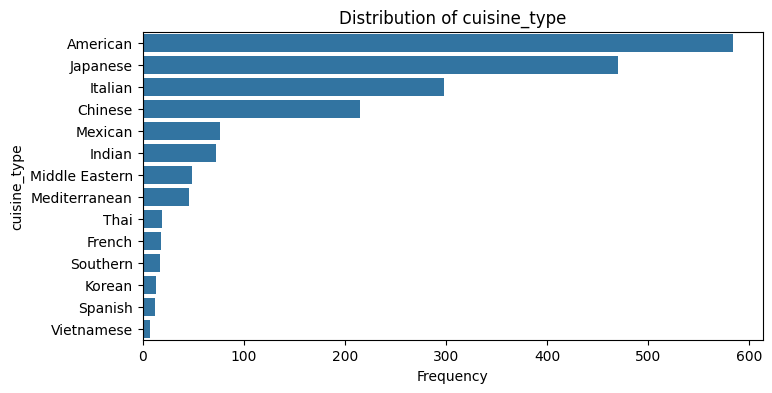

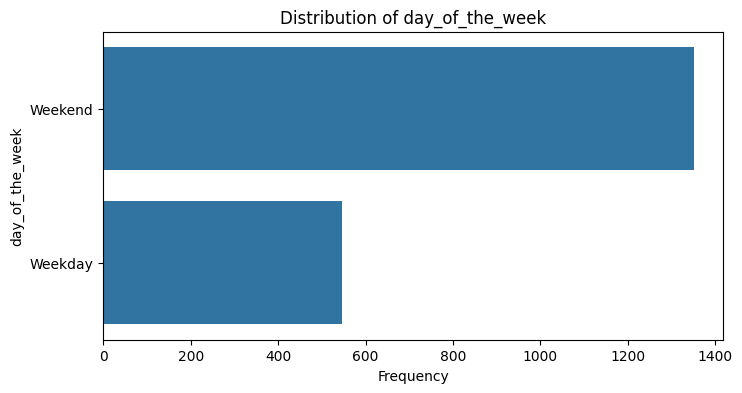

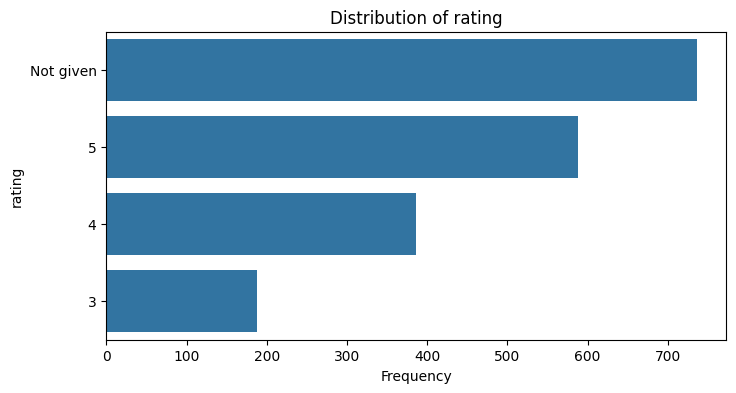

In [25]:
# Plot distributions for numerical and categorical columns
# for numeric we will plot histogram
# for catagorical we plot countplt
def plot_distributions(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = dataframe.select_dtypes(include=['object']).columns

    # Numerical Columns
    for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(dataframe[col], kde=True, bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

    # Categorical Columns
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=col, data=dataframe, order=dataframe[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xlabel("Frequency")
        plt.ylabel(col)
        plt.show()

# Call the function to plot distributions
plot_distributions(df)


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [26]:
# Write the code here
topd5=df['restaurant_name'].value_counts().head(5)
topd5

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [27]:
# Write the code here
popular_cuisine_weekends = (
    df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
)
print(f"The most popular cuisine on weekends is: {popular_cuisine_weekends}")

The most popular cuisine on weekends is: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [31]:
# Write the code here
highOrderCost = (df['cost_of_the_order']>20).mean()*100
print(f"{highOrderCost:.2f}% of the orders cost more than $20.")

29.24% of the orders cost more than $20.


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [32]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print(f"Mean delivery time: {mean_delivery_time:.2f} minutes")

Mean delivery time: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [33]:
# Write the code here
top_customers = df['customer_id'].value_counts().head(3)
print("Top 3 Most Frequent Customers:")
print(top_customers)

Top 3 Most Frequent Customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


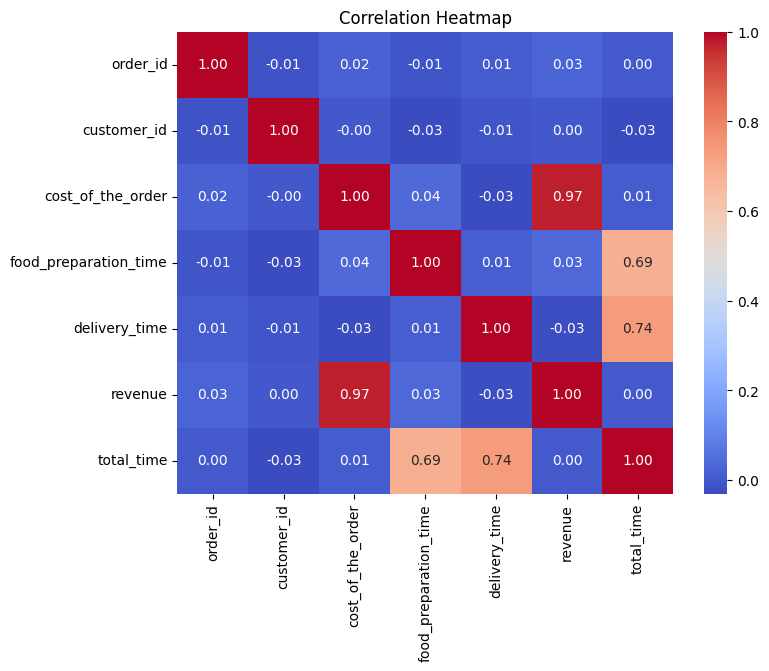

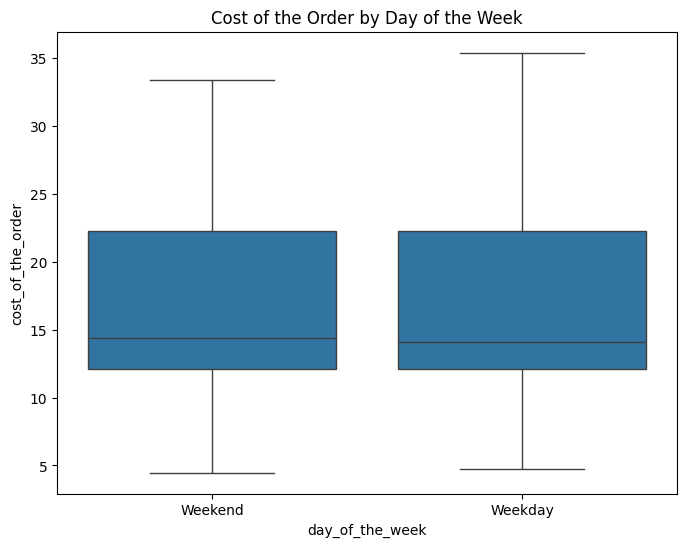

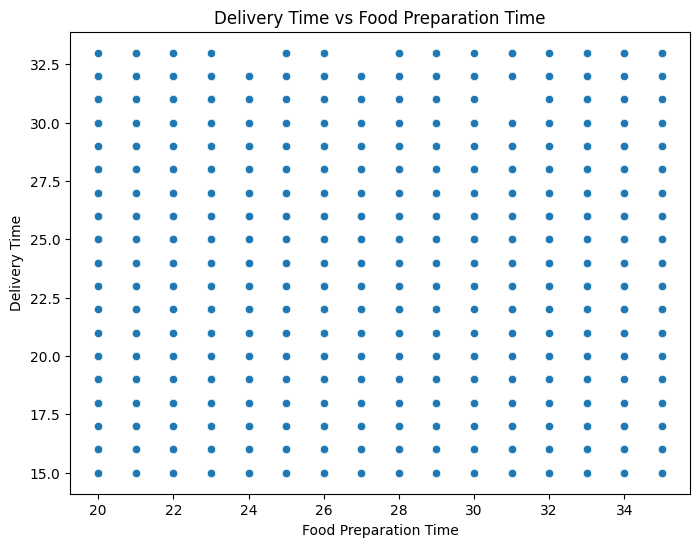

In [40]:
# Write the code here
def multivariate_analysis(dataframe):
    # Correlation heatmap for numerical variables
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataframe.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

    # Boxplot: Cost of the order by day of the week
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=dataframe)
    plt.title("Cost of the Order by Day of the Week")
    plt.show()

    # Scatterplot: Delivery time vs food preparation time
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='food_preparation_time', y='delivery_time', data=dataframe)
    plt.title("Delivery Time vs Food Preparation Time")
    plt.xlabel("Food Preparation Time")
    plt.ylabel("Delivery Time")
    plt.show()

# Perform multivariate analysis
multivariate_analysis(df)


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
# Write the code here
# Restaurants with >50 ratings and average rating >4
promotional_offer_restaurants = (
    df[df['rating'] != "Not given"]
    .groupby('restaurant_name')
    .agg(
        rating_count=('rating', 'size'),
        average_rating=('rating', lambda x: pd.to_numeric(x).mean()),
    )
    .query("rating_count > 50 and average_rating > 4")
)
promotional_offer_restaurants = promotional_offer_restaurants.reset_index()
print("Restaurants qualifying for promotional offers:")
print(promotional_offer_restaurants)


Restaurants qualifying for promotional offers:
             restaurant_name  rating_count  average_rating
0  Blue Ribbon Fried Chicken            64        4.328125
1          Blue Ribbon Sushi            73        4.219178
2                Shake Shack           133        4.278195
3          The Meatball Shop            84        4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [36]:
# Write the code here
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0

# Calculate revenue
df['revenue'] = df.apply(calculate_revenue, axis=1)
total_revenue = df['revenue'].sum()
print(f"Total Revenue Generated by the Company: ${total_revenue:.2f}")


Total Revenue Generated by the Company: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [37]:
# Write the code here
# Calculate total time for orders
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
percentage_above_60 = (df['total_time'] > 60).mean() * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [38]:
# Write the code here
# Calculate mean delivery time grouped by day of the week
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
print("Mean Delivery Time by Day of the Week:")
print(mean_delivery_time_by_day)


Mean Delivery Time by Day of the Week:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  **Popular resturant**


   Shake Shack is most popular resturant



*   **Cuisine Preferences:**

   American cousine is most popular



*   **Order Value:**



  Approximately 29.24% of the orders cost more than $20



*  **Customer Feedback and Ratings:**



   Several restaurants with more than 50 ratings and average ratings above 4 indicate high customer satisfaction. Examples include Shake Shack, The Meatball Shop, and Blue Ribbon Fried Chicken



*  **Revenue Generation:**

The company has generated approximately $6,166 in revenue from delivery charges

























### Recommendations:

*  **Leverage Popular Restaurants and Cuisines:**

Collaborate with top-performing restaurants like Shake Shack and The Meatball Shop for exclusive offers, priority delivery, or featured placements on the app.


**Improve Delivery Speed**

Optimize delivery routes and deploy additional delivery personnel during peak weekday hours to reduce delays.


**Encourage High-Value Orders:**

Introduce incentives such as free delivery or discounts for orders above $20 to boost premium order volume.

**Focus on Customer Feedback:**

Implement a loyalty program where customers earn rewards for providing feedback and ratings.


by implementing this kind of techniques app will become more reliable



---